## Logistic Regression problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

In [2]:
col_names=['pregnant','glucose','bp','skin','insulin','pedigree','age','label']
pid=pd.read_csv("datasets/pima-indians-diabetes (1).data",header=None,names=col_names)

In [3]:
pid.head()

,pregnant,glucose,bp,skin,insulin,pedigree,age,label
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


#### find out feature columns

In [4]:
pid.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'pedigree', 'age',
       'label'],
      dtype='object')

In [5]:
feature_columns=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'pedigree', 'age']

#### Extract the independent variable X and dependent variable y

In [6]:
x=pid[feature_columns]
y=pid.label

#### split the data

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [8]:
x_train.head()

,pregnant,glucose,bp,skin,insulin,pedigree,age
15,136,70,32,110,37.1,0.153,43
0,97,64,36,100,36.8,0.600,25
1,116,70,28,0,27.4,0.204,21
2,106,64,35,119,30.5,1.400,34
0,123,88,37,0,35.2,0.197,29


#### train a logistic model

In [9]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

#### predict the model

In [10]:
y_pred_class=model.predict(x_test)
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

### Evaluating the model:(classification_report)

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred_class))
print(accuracy_score(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.56      0.65        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231

0.7792207792207793


### Confusion Matrix

In [12]:
# this produces a 2*2 numpy array(matrix)
print(metrics.confusion_matrix(y_test,y_pred_class))

[[132  14]
 [ 37  48]]


#### save confusion matrix and slice into four pieces

In [13]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)
#[row,column]
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

[[132  14]
 [ 37  48]]


#### metrics computed from a confusion matrix

In [14]:
# using manual calculation
print((TP+TN)/float(TP+TN+FP+FN))
# using inbuilt function
print(metrics.accuracy_score(y_test,y_pred_class))

0.7792207792207793
0.7792207792207793


In [15]:
classification_error=(FP+FN)/float(TP+TN+FP+FN)
print(classification_error)
print(1-metrics.accuracy_score(y_test,y_pred_class))

0.22077922077922077
0.22077922077922074


In [16]:
sensitivity=TP/float(FN+TP)
print(sensitivity)
print(metrics.recall_score(y_test,y_pred_class))

0.5647058823529412
0.5647058823529412


In [17]:
specificity=TN/(TN+FP)
print(specificity)

0.9041095890410958


In [18]:
false_positive_rate=FP/float(TN/FP)
print(false_positive_rate)
print(1-specificity)

1.4848484848484849
0.09589041095890416


### Receiver Operating Characteristics(ROC) Curves

In [19]:
y_pred_prob=model.predict_proba(x_test)[:,1]

In [20]:
y_pred_prob[:10]

array([0.40304577, 0.33562149, 0.11375761, 0.07359523, 0.24198512,
       0.32544615, 0.34219964, 0.12272923, 0.20185634, 0.25300131])

AttributeError: module 'matplotlib.pyplot' has no attribute 'rcparams'

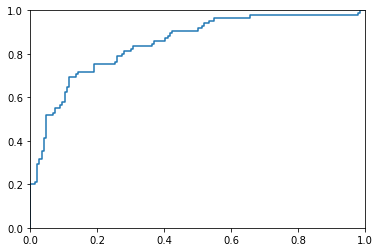

In [21]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcparams['font.size']=12
plt.title('ROC curve for diabetes classifier')
plt.xlbel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.grid(True)

#### define a function that accepts a threshold and prints sensitivity and specificity

In [22]:
def evaluate_threshold(threshold):
    print('Sensitivity:',tpr[thresholds > threshold][-1])
    print('Specificity:',1-fpr[thresholds >threshold][-1])

In [23]:
evaluate_threshold(0.5)

Sensitivity: 0.5647058823529412
Specificity: 0.904109589041096


In [26]:
evaluate_threshold(0.3)

Sensitivity: 0.7529411764705882
Specificity: 0.7465753424657534
